In [47]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
url = '/content/Unemployment_Rate_upto_11_2020.csv'  # Update this with your dataset URL or local path

# Check if the column name 'Date' is correct
try:
    df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
except ValueError:
    # If ValueError occurs, it means the column name is likely incorrect
    # Read the data without parsing dates first
    df = pd.read_csv(url)

    # Check the actual column names in the DataFrame
    print(df.columns)

    # Update the 'parse_dates' and 'index_col' parameters with the correct column name
    # For example, if the date column is named 'Reported Date':
    # df = pd.read_csv(url, parse_dates=['Reported Date'], index_col='Reported Date')

    # Handle the error or make necessary changes based on the column names found
    # ... (Your logic to handle the error and continue) ...

Index(['Region', ' Date', ' Frequency', 'Unemployment Rate',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [48]:
print(df.head())        # Display the first few rows of the dataset


           Region         Date  Frequency  Unemployment Rate  \
0  Andhra Pradesh   31-01-2020          M               5.48   
1  Andhra Pradesh   29-02-2020          M               5.83   
2  Andhra Pradesh   31-03-2020          M               5.79   
3  Andhra Pradesh   30-04-2020          M              20.51   
4  Andhra Pradesh   31-05-2020          M              17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74  


In [49]:
print(df.info())        # Display information about the dataset, including null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3   Unemployment Rate                         267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [50]:
print(df.describe())

       Unemployment Rate   Estimated Employed  \
count         267.000000         2.670000e+02   
mean           12.236929         1.396211e+07   
std            10.803283         1.336632e+07   
min             0.500000         1.175420e+05   
25%             4.845000         2.838930e+06   
50%             9.650000         9.732417e+06   
75%            16.755000         2.187869e+07   
max            75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.112400   76.085600  
50%                                   40.390000   23.610200   79.019300  
75%                                   44

In [51]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Unemployment Rate,0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [52]:
df = df.interpolate(method='linear')

<ipython-input-52-bdc865afced7>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


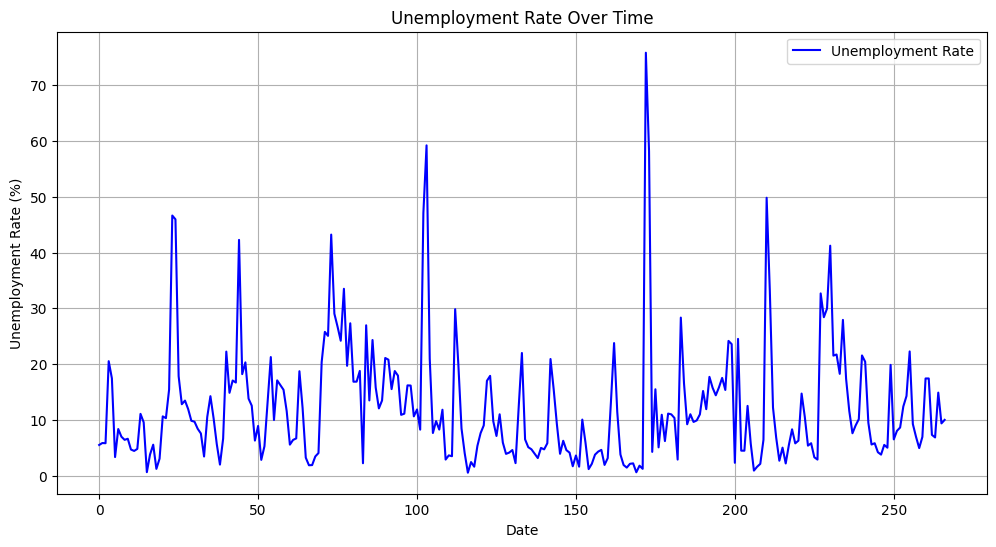

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Unemployment Rate'], color='blue', label='Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()


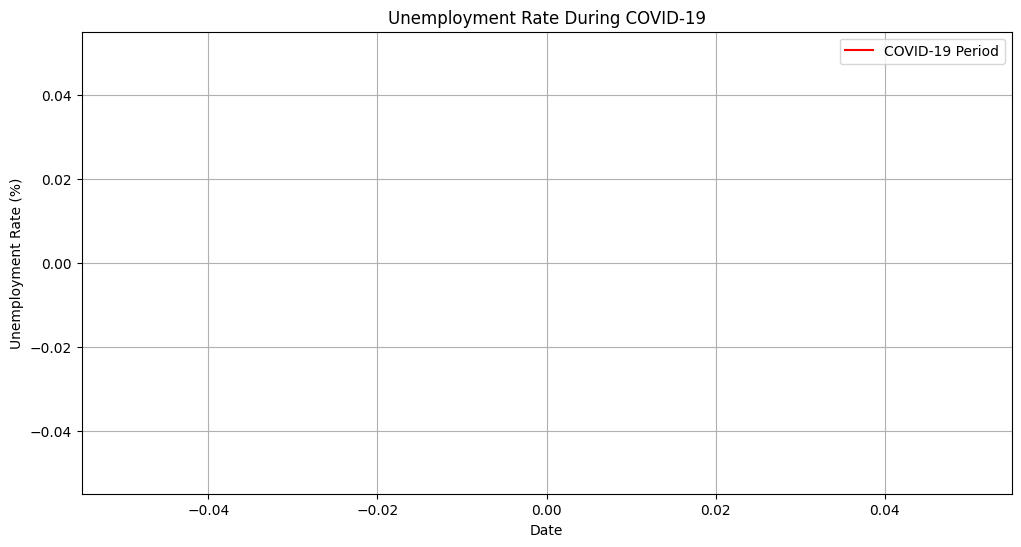

In [54]:
covid_period = df.loc['2020-03':'2022-12']
plt.figure(figsize=(12, 6))
plt.plot(covid_period.index, covid_period['Unemployment Rate'], color='red', label='COVID-19 Period')
plt.title('Unemployment Rate During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

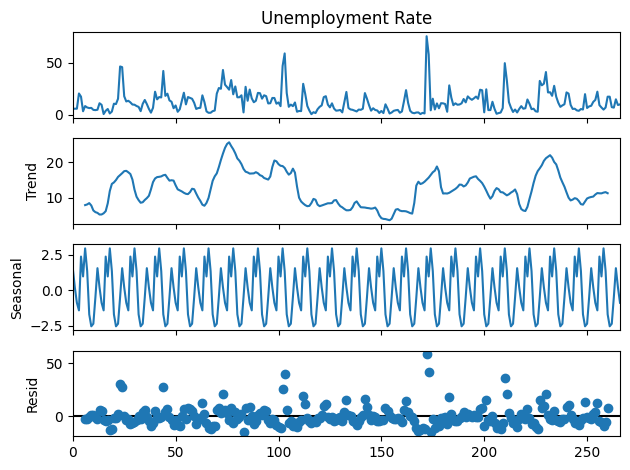

In [55]:
# Step 7: Decompose the unemployment time series to examine trend, seasonality, and noise
# Ensure the dataset is monthly for proper decomposition
decomposition = seasonal_decompose(df['Unemployment Rate'], model='additive', period=12)
decomposition.plot()
plt.show()
